In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [26]:
# Zadanie 1

def f(x1, x2):
    return np.array([
        x1 + np.exp(-x2),
        x1 * x1 + 2 * x2 + 1,
    ])

def g(x1, x2):
    return x1 + x1 * x1 * x1 + x2 + x2 * x2


def f_func(x1, x2, mi, z):
    a = f(x1, x2)
    return np.array([a[0], a[1], np.sqrt(mi) * g(x1, x2) + z/(2 * np.sqrt(mi))])


def Df(x1, x2):
    return np.array([
        [1, 2 * x1],
        [- np.exp(-x2), 2]
    ]).transpose()

def Dg(x1, x2):
    return np.array([
        (1 + 3 * x1 * x1),
        (1 + 2 * x2),
    ])

def get_Df(x1, x2, mi):
    return np.vstack([Df(x1, x2), np.sqrt(mi) * Dg(x1, x2)])


In [27]:
Df(1, 2)

array([[ 1.        , -0.13533528],
       [ 2.        ,  2.        ]])

In [28]:
Dg(1, 2)

array([4, 5])

In [29]:
print(get_Df(1, 2, 3))

print(np.vstack([Df(1, 2), Dg(1, 2)]))

[[ 1.         -0.13533528]
 [ 2.          2.        ]
 [ 6.92820323  8.66025404]]
[[ 1.         -0.13533528]
 [ 2.          2.        ]
 [ 4.          5.        ]]


In [30]:
lambda_ = 1
k = 0
k_max = 35
x = np.array([0.5, -0.5])
mi = 1
z = 0
l_max = 10


x_backtrack = [x]
OR_backtrack = [np.linalg.norm(2 * Df(*x).transpose() @ f(*x) + Dg(*x).transpose() * z, ord=1)]
FR_backtrack = [np.linalg.norm([g(*x)], ord=2)]
# lambda_backtrack = [lambda_]
# norm_backtrack = [np.linalg.norm(f_func(*x, mi, z), ord=2) ** 2]
for _ in range(l_max):
    x_old = x
    for _ in range(k_max):
        J = get_Df(*x, mi)
        x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(len(x))) @ J.transpose() @ f_func(*x, mi, z)
        if np.linalg.norm(f_func(*x_new, mi, z), ord=2) < np.linalg.norm(f_func(*x, mi, z), ord=2):
            lambda_ *= 0.8
            x = x_new
        else:
            lambda_ *= 2
            
    z = z + 2 * mi * g(*x)
    if np.abs(g(*x_new)) >= 0.25 * np.abs(g(*x_old)):
        mi *= 2
    OR_backtrack.append(np.linalg.norm(2 * Df(*x).transpose() @ f(*x) + Dg(*x).transpose() * z, ord=1))
    FR_backtrack.append(np.linalg.norm([g(*x)], ord=1))
    x_backtrack.append(x)
#     lambda_backtrack.append(lambda_)
#     norm_backtrack.append(np.linalg.norm(f_func(*x, mi, z), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
OR_backtrack = np.array(OR_backtrack)
FR_backtrack = np.array(FR_backtrack)

# lambda_backtrack = np.array(lambda_backtrack)
# norm_backtrack = np.array(norm_backtrack)

<a list of 11 text.Text objects>

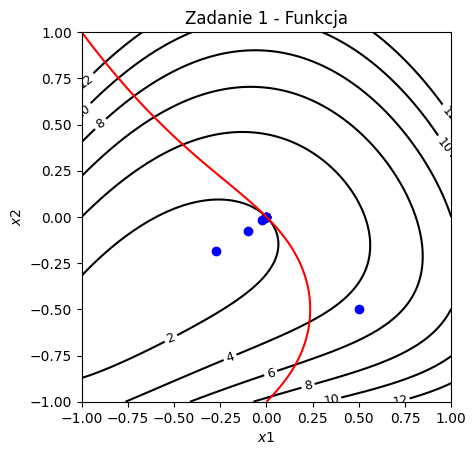

In [31]:
X1 = np.linspace(-1, 1, 1000)
X2 = np.linspace(-1, 1, 1000)
x1, x2 = np.meshgrid(X1, X2)
a = plt.contour(x1, x2, np.linalg.norm(f(x1, x2), ord=2, axis=0) ** 2, [2, 4, 6, 8, 10, 12], colors='k')
b = plt.contour(x1, x2, g(x1, x2), [0], colors=['r'])
plt.scatter(x_backtrack[:, 0], x_backtrack[:, 1], c='b')
plt.title("Zadanie 1 - Funkcja")
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.gca().set_aspect('equal')
plt.clabel(a, fontsize=9, inline=True)

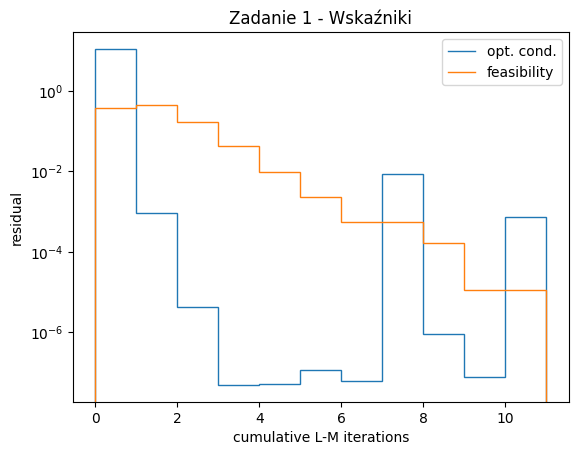

In [32]:
plt.stairs(OR_backtrack)
plt.stairs(FR_backtrack)
plt.title("Zadanie 1 - Wskaźniki")
plt.xlabel("cumulative L-M iterations")
plt.ylabel("residual")
plt.legend(['opt. cond.','feasibility']) 
plt.yscale('log')

In [33]:
# Zadanie 2a

def f(x1, x2, x3):
    return ((x1 - 1) ** 2 + (x2 - 1) ** 2 + (x3 - 1) ** 2)

def g(x1, x2, x3):
    return np.array([
            x1 * x1 + 0.5 * x2 * x2 + x3 * x3 - 1,
            0.8 * x1 * x1 + 2.5 * x2 * x2 + x3 * x3 + 2 * x1 * x3 - x1 - x2 - x3 - 1  
        ])

def f_func(x1, x2, x3, mi, z):
    a = f(x1, x2, x3)
    return np.array([a, *(np.sqrt(mi) * g(x1, x2, x3) + z/(2 * np.sqrt(mi)))])


def Df(x1, x2, x3):
    return np.array([
        2 * x1 - 2, 2 * x2 - 2, 2 * x3 - 2
    ])

def Dg(x1, x2, x3):
    return np.array([
        [2 * x1, 1.6 * x1 + 2 * x3 - 1],
        [x2, 5 * x2 - 1],
        [2 * x3, 2 * x3 + 2 * x1 - 1]
    ]).transpose()

def get_Df(x1, x2, x3, mi):
    return np.vstack([Df(x1, x2, x3), np.sqrt(mi) * Dg(x1, x2, x3)])

In [34]:
print(get_Df(1, 2, 3, 4))

print(np.vstack([Df(1, 2, 3),  Dg(1, 2, 3)]))

[[ 0.   2.   4. ]
 [ 4.   4.  12. ]
 [13.2 18.  14. ]]
[[0.  2.  4. ]
 [2.  2.  6. ]
 [6.6 9.  7. ]]


In [35]:
lambda_ = 1
k = 0
k_max = 35
x = np.array([0, 0, 0])
mi = 1
z = np.array([0, 0])
l_max = 1000


x_backtrack = [x]
OR_backtrack = [np.linalg.norm(2 * Df(*x).transpose() * f(*x) + Dg(*x).transpose() @ z, ord=1)]
FR_backtrack = [np.linalg.norm([g(*x)], ord=2)]
mi_backtrack = [mi]
# lambda_backtrack = [lambda_]
# norm_backtrack = [np.linalg.norm(f_func(*x, mi, z), ord=2) ** 2]
for l in range(l_max):
    x_old = x
    for _ in range(k_max):
        J = get_Df(*x, mi)
        x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(len(x))) @ J.transpose() @ f_func(*x, mi, z)
        if np.linalg.norm(f_func(*x_new, mi, z), ord=2) < np.linalg.norm(f_func(*x, mi, z), ord=2):
            lambda_ *= 0.8
            x = x_new
        else:
            lambda_ *= 2
            
    z = z + 2 * mi * g(*x)
    if np.linalg.norm(g(*x_new), ord=2) >= 0.25 * np.linalg.norm(g(*x_old), ord=2):
        mi *= 2

    curr_OR = np.linalg.norm(2 * Df(*x).transpose() * f(*x) + Dg(*x).transpose() @ z, ord=1)
    OR_backtrack.append(curr_OR)
    curr_FR = np.linalg.norm([g(*x)], ord=1)
    FR_backtrack.append(curr_FR)
    x_backtrack.append(x)
    mi_backtrack.append(mi)

    if curr_OR < 1e-5 and curr_FR < 1e-5:
        print(f"Converged after {l} iterations")
        break

x_backtrack = np.array(x_backtrack)
OR_backtrack = np.array(OR_backtrack)
FR_backtrack = np.array(FR_backtrack)


Converged after 6 iterations


In [36]:
x

array([0.56770135, 0.83277788, 0.57528931])

In [37]:
f(*x)

0.395224527413758

In [38]:
Dg(*x).transpose()

array([[1.1354027 , 1.05890079],
       [0.83277788, 3.1638894 ],
       [1.15057863, 1.28598133]])

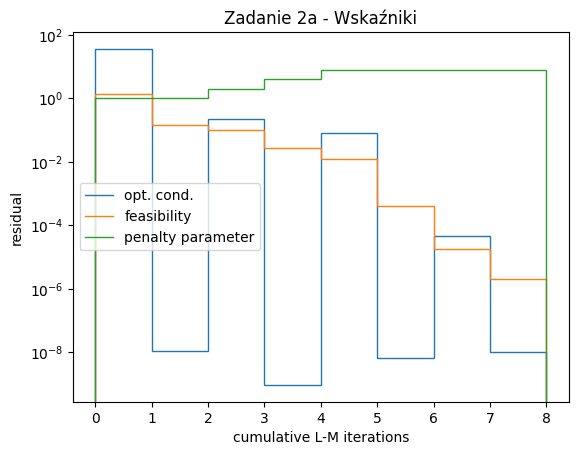

In [39]:
plt.stairs(OR_backtrack)
plt.stairs(FR_backtrack)
plt.stairs(mi_backtrack)
plt.title("Zadanie 2a - Wskaźniki")
plt.xlabel("cumulative L-M iterations")
plt.ylabel("residual")
plt.legend(['opt. cond.','feasibility', 'penalty parameter']) 
plt.yscale('log')

In [40]:
# Zadanie 2b

lambda_ = 1
k = 0
k_max = 35
x = np.array([0, 0, 0])
mi = 1
z = np.array([0, 0])
l_max = 10


x_backtrack = [x]
mi_backtrack = [mi]
for l in range(l_max):
    x_old = x
    for _ in range(k_max):
        J = get_Df(*x, mi)
        x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(len(x))) @ J.transpose() @ f_func(*x, mi, z)
        if np.linalg.norm(f_func(*x_new, mi, z), ord=2) < np.linalg.norm(f_func(*x, mi, z), ord=2):
            lambda_ *= 0.8
            x = x_new
        else:
            lambda_ *= 2
            
    mi *= 2
    x_backtrack.append(x)
    mi_backtrack.append(mi)

x_backtrack = np.array(x_backtrack)
OR_backtrack = np.array(OR_backtrack)
FR_backtrack = np.array(FR_backtrack)


In [41]:
x

array([0.56813574, 0.83243853, 0.57569129])

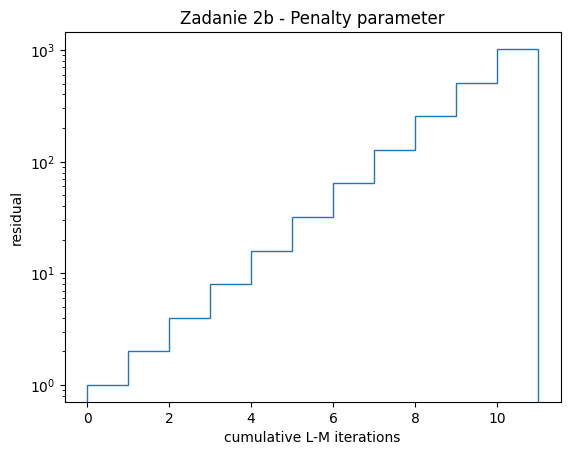

In [42]:
plt.stairs(mi_backtrack)
plt.title("Zadanie 2b - Penalty parameter")
plt.xlabel("cumulative L-M iterations")
plt.ylabel("residual")
plt.yscale('log')

In [43]:
n = 1000
m = np.random.rand(n, n)
mx = np.sum(np.abs(m), axis=1)
np.fill_diagonal(m, mx)

A = m
x_goal = np.random.choice([-1, 1], n)
b = A @ x_goal

In [44]:
# Zadanie 3

def f(*x):
    return A @ x - b

def g(*x):
    return np.array([2 * xi for xi in x])

def f_func(*x, mi, z):
    a = f(*x)
    return np.array([*a, *(np.sqrt(mi) * g(*x) + z/(2 * np.sqrt(mi)))])


def Df(*x):
    return A

def Dg(*x):
    return 2 * np.diag(x)

def get_Df(*x, mi):
    return np.vstack([Df(*x), np.sqrt(mi) * Dg(*x)])

In [45]:
k = 0
k_max = 5
x = np.ones(n)
mi = 1
z = np.zeros(n)
l_max = 5


x_backtrack = [x]
OR_backtrack = [np.linalg.norm(2 * Df(*x).transpose() * f(*x) + Dg(*x).transpose() @ z, ord=1)]
FR_backtrack = [np.linalg.norm([g(*x)], ord=2)]
mi_backtrack = [mi]
obj_val_backtrack = [np.linalg.norm(A @ x - b)]

for l in range(l_max):
    x_old = x
    for _ in range(k_max):
        lambda_ = 1
        J = get_Df(*x, mi=mi)
        x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(len(x))) @ J.transpose() @ f_func(*x, mi=mi, z=z)
        if np.linalg.norm(f_func(*x_new, mi=mi, z=z), ord=2) < np.linalg.norm(f_func(*x, mi=mi, z=z), ord=2):
            lambda_ *= 0.8
            x = x_new
        else:
            lambda_ *= 2
            
    x = np.sign(x)
    obj_val_backtrack.append(np.linalg.norm(A @ x - b))

        
    z = z + 2 * mi * g(*x)
    if np.linalg.norm(g(*x_new), ord=2) >= 0.25 * np.linalg.norm(g(*x_old), ord=2):
        mi *= 2

    curr_OR = np.linalg.norm(2 * Df(*x).transpose() * f(*x) + Dg(*x).transpose() @ z, ord=1)
    OR_backtrack.append(curr_OR)
    curr_FR = np.linalg.norm([g(*x)], ord=1)
    FR_backtrack.append(curr_FR)
    x_backtrack.append(x)
    mi_backtrack.append(mi)

    if curr_OR < 1e-5 and curr_FR < 1e-5:
        print(f"Converged after {l} iterations")
        break

x_backtrack = np.array(x_backtrack)
OR_backtrack = np.array(OR_backtrack)
FR_backtrack = np.array(FR_backtrack)


In [46]:
np.sum(np.abs(x_goal) - np.abs(x))

0.0

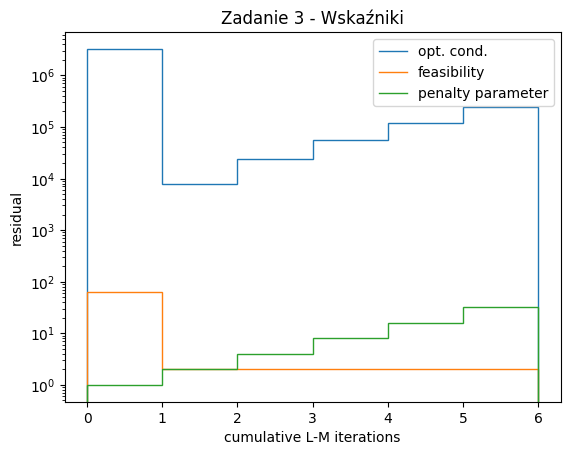

In [47]:
plt.stairs(OR_backtrack)
plt.stairs(FR_backtrack)
plt.stairs(mi_backtrack)
plt.title("Zadanie 3 - Wskaźniki")
plt.xlabel("cumulative L-M iterations")
plt.ylabel("residual")
plt.legend(['opt. cond.','feasibility', 'penalty parameter']) 
plt.yscale('log')

Text(0, 0.5, 'residual')

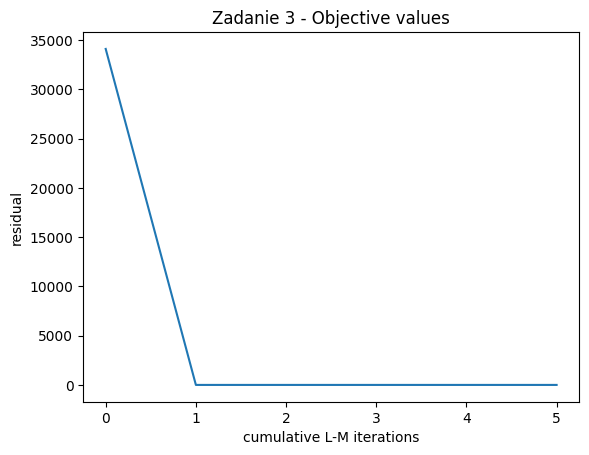

In [48]:
plt.plot(obj_val_backtrack)
plt.title("Zadanie 3 - Objective values")
plt.xlabel("cumulative L-M iterations")
plt.ylabel("residual")